## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Caracterizacion.xlsx"
data = pd.read_excel(data)
print(data)

    Corriente (A)  Campo Magnético (T)
0           -2.88                -54.2
1           -2.77                -51.6
2           -2.67                -49.6
3           -2.56                -47.8
4           -2.48                -45.7
5           -2.37                -44.6
6           -2.27                -42.9
7           -2.18                -40.8
8           -2.07                -38.2
9           -1.96                -37.3
10          -1.87                -34.8
11          -1.77                -32.4
12          -1.67                -30.8
13          -1.57                -29.8
14          -1.46                -26.8
15          -1.37                -25.3
16          -1.26                -24.2
17          -1.18                -22.7
18          -1.07                -19.7
19          -0.98                -18.9
20          -0.87                -16.3
21          -0.78                -14.9
22          -0.66                -12.8
23          -0.57                -10.9
24          -0.48        

In [3]:
I=np.array(data['Corriente (A)'])
B=np.array(data['Campo Magnético (T)'])


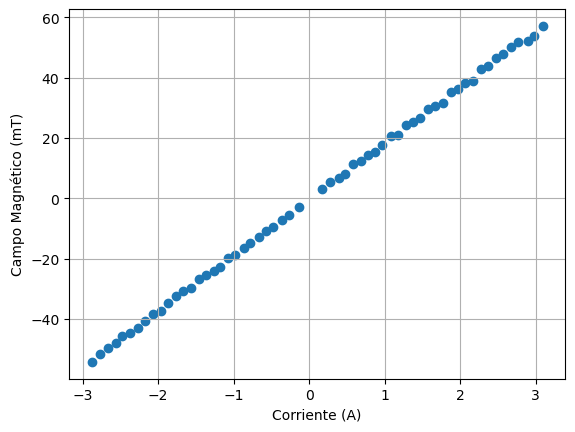

In [4]:
plt.scatter(I,B)
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnético (mT)')
plt.grid()

In [5]:
def Regresion(I,B):
    n=len(I)

    sumI = np.sum(I)
    sumB = np.sum(B)

    m = (np.sum(I*B) - (sumI*sumB)/ n)/(np.sum(I**2) - (sumI**2)/n)
    b = (sumB - m*sumI)/n 
    
    IF=I.reshape((len(I),1))
    BF=B.reshape((len(B),1))
    model=linear_model.LinearRegression()
    model.fit(IF,BF)
    pred=model.predict(IF)
    R2=r2_score(BF,pred)
    
    return(m,b,R2)

In [6]:
regr=Regresion(I,B)
regr=(round(regr[0],4),round(regr[1],4),round(regr[2],4))
Is=np.linspace(-2.88,3.09,1000)
Bs=Is*regr[0]+regr[1]
regr

(18.5804, -0.2236, 0.9997)

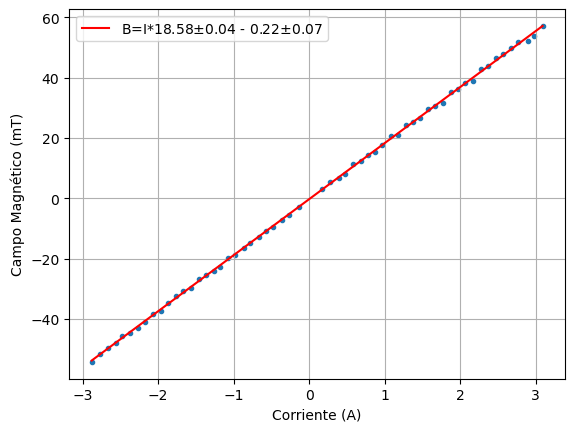

In [30]:
plt.plot(Is,Bs,color='r', label='B=I*'+str(round(regr[0],2))+'$\pm 0.04 $ - '+str(round(abs(regr[1]),2))+'$\pm 0.07 $')
plt.scatter(I,B,marker='.')
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnético (mT)')
plt.grid()
plt.legend()

## Hierro

In [12]:
lamb=672e-9
l=14.25e-2
delta=lambda N: N*lamb/2

In [13]:
I_Fe=np.array([0.14,1.18,2.55])
Conteo_Fe=np.array([0,1,0])

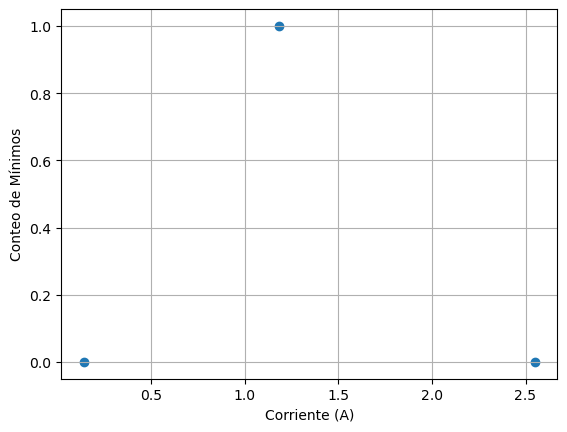

In [14]:
plt.scatter(I_Fe,Conteo_Fe)
plt.xlabel('Corriente (A)')
plt.ylabel('Conteo de Mínimos')
plt.grid()

In [15]:
B_Fe=I_Fe*regr[0]+regr[1]
Long_Fe=delta(Conteo_Fe)/l

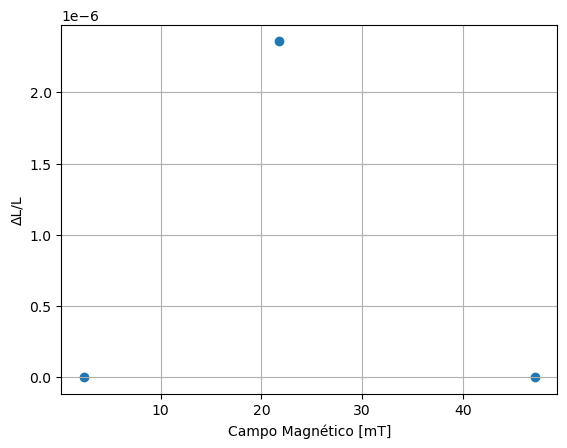

In [21]:
plt.scatter(B_Fe,Long_Fe)
plt.xlabel('Campo Magnético [mT]')
plt.ylabel('ΔL/L')
plt.grid()

## Niquel

In [23]:
I_Ni=np.array([-3.22,-2.18,-1.72,-1.08,-0.74,-0.49,-0.36,-0.26,-0.14,0.14,0.21,0.28,0.38,0.5,0.7,0.95,1.48,2.77])
Conteo_Ni=np.array([8,7,6,5,4,3,2,1,0,0,1,2,3,4,5,6,7,8])

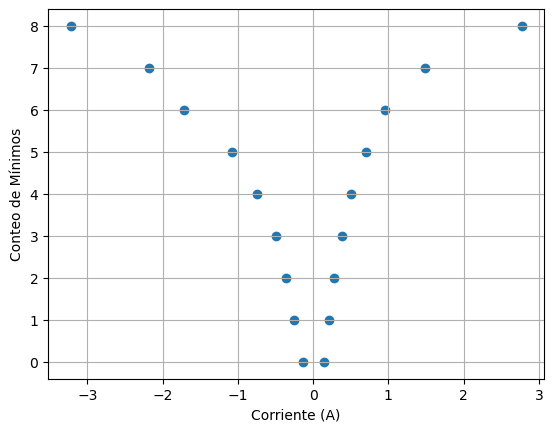

In [24]:
plt.scatter(I_Ni,Conteo_Ni)
plt.xlabel('Corriente (A)')
plt.ylabel('Conteo de Mínimos')
plt.grid()

In [25]:
B_Ni=I_Ni*regr[0]+regr[1]
Long_Ni=delta(Conteo_Ni)/l

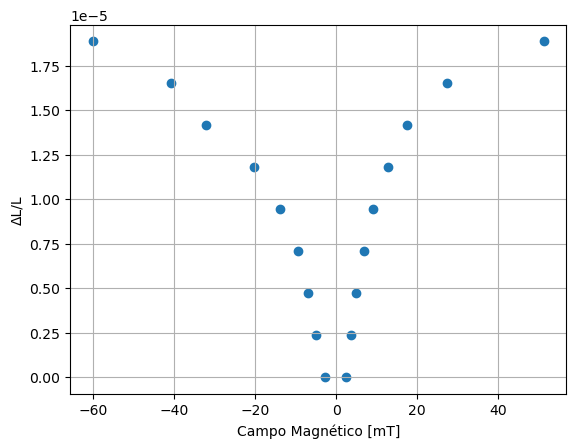

In [26]:
plt.scatter(B_Ni,Long_Ni)
plt.xlabel('Campo Magnético [mT]')
plt.ylabel('ΔL/L')
plt.grid()